# **Challenge Alura Store**

## **1. Extracción de datos**

In [12]:
# Librerías a utilizar
import pandas as pd

# Diccionario con las url's
urls = {
    "tienda1" : "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "tienda2" : "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "tienda3" : "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "tienda4" : "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv",
}

## **2. Análisis de datos**

### **2.1 Ingreso total de cada tienda**

In [14]:
# Extracción de datos de los CSV y suma del precio total de cada tienda
ingreso_total = {}

for tienda, url in urls.items():
    df = pd.read_csv(url)
    ingreso_total[tienda] = df["Precio"].sum()

In [15]:
ingreso_total.items()

dict_items([('tienda1', np.float64(1150880400.0)), ('tienda2', np.float64(1116343500.0)), ('tienda3', np.float64(1098019600.0)), ('tienda4', np.float64(1038375700.0))])

In [16]:
# Mostrar el ingreso total por cada tienda
conteo = 1
for ingreso in ingreso_total.values():
    print(f"Facturación total de la Tienda {conteo} es: {ingreso}")
    conteo += 1

Facturación total de la Tienda 1 es: 1150880400.0
Facturación total de la Tienda 2 es: 1116343500.0
Facturación total de la Tienda 3 es: 1098019600.0
Facturación total de la Tienda 4 es: 1038375700.0


### **2.2 Ventas por categoría**

In [28]:
# DataFrame para incorporar cada uno de los DataFrames individuales
dfs = []

# Lectura de cada archivo y agregar la columna para identificar el origen de cada tienda
for nombre_tienda, url in urls.items():
    df = pd.read_csv(url)
    df['Tienda'] = nombre_tienda
    dfs.append(df)

# Unir y concatenar todos los DataFrames en uno solo
df_total = pd.concat(dfs, ignore_index = True)

# Agrupar por tienda y categoría, y sumar las ventas
ventas_por_categoria = df_total.groupby(['Tienda', 'Categoría del Producto'])['Precio'].sum().reset_index()

# Obtener la categoría más vendida por tienda
idx = ventas_por_categoria.groupby('Tienda')['Precio'].idxmax()
top_categorias = ventas_por_categoria.loc[idx]

# Formatear el precio
top_categorias['Precio'] = top_categorias['Precio'].apply(lambda x: f"$ {x:,.2f}")

# Calcular el total por tienda
#totales_por_tienda = ventas_por_categoria.groupby('Tienda')['Precio'].transform('sum')

# Formateo de las columnas precio y porcentaje
#ventas_por_categoria['Precio'] = ventas_por_categoria['Precio'].apply(lambda x: f"{x:,.2f}")

# Mostrar el resultado
#print(ventas_por_categoria.tail())
print(top_categorias)

     Tienda Categoría del Producto            Precio
3   tienda1           Electrónicos  $ 429,493,500.00
11  tienda2           Electrónicos  $ 410,831,100.00
19  tienda3           Electrónicos  $ 410,775,800.00
27  tienda4           Electrónicos  $ 409,476,100.00


### **2.3 Valoración media por tienda**

In [21]:
# Calcular la valoración media por tienda
valoracion_media = (
    df_total
    .groupby('Tienda')['Calificación']
    .mean()
    .reset_index()
)

print(valoracion_media)

    Tienda  Calificación
0  tienda1      3.976685
1  tienda2      4.037304
2  tienda3      4.048326
3  tienda4      3.995759


### **2.4 Productos más vendidos y menos vendidos**

In [23]:
# Productos más vendidos
productos_mas_vendidos = (
    df_total['Producto']
    .value_counts()
    .head(5)
    .reset_index()
)

productos_mas_vendidos.columns = ['Producto', 'Cantidad de Ventas']

print(productos_mas_vendidos)

                    Producto  Cantidad de Ventas
0              Mesa de noche                 210
1  Carrito de control remoto                 206
2                 Microondas                 206
3                    Batería                 203
4                  Cama king                 201


In [ ]:
# Productos menos vendidos
productos_menos_vendidos = (
    df_total['Producto']
    .value_counts()
    .tail(10)
    .reset_index()
)

productos_menos_vendidos.columns = ['Producto', 'Cantidad de Ventas']

print(productos_menos_vendidos)

### **2.5 Valor del envío promedio por tienda**

In [27]:
# Valor promedio del envío por tienda
envio_promedio = (
    df_total
    .groupby('Tienda')['Costo de envío']
    .mean()
    .reset_index()
)

# Formatear la columna de costo de envío
envio_promedio['Costo de envío'] = envio_promedio['Costo de envío'].apply(lambda x: f"$ {x:,.2f}")

print(envio_promedio)

    Tienda Costo de envío
0  tienda1    $ 26,018.61
1  tienda2    $ 25,216.24
2  tienda3    $ 24,805.68
3  tienda4    $ 23,459.46


## **3. Generación de gráficos**

### **3.1 Desempeño Económico**

In [40]:
import numpy as np
import matplotlib.pyplot as plt

#### **3.1.1 Ingresos totales por tienda**

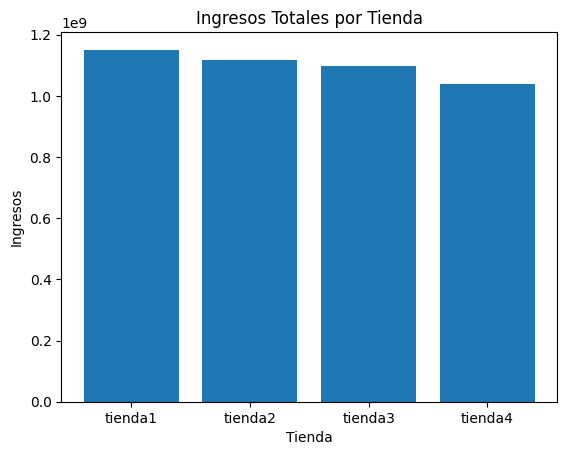

In [41]:
ingresos = (
    df_total
    .groupby('Tienda')['Precio']
    .sum()
    .reset_index()
)

plt.figure()
plt.bar(ingresos['Tienda'], ingresos['Precio'])
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos')
plt.show()

#### **3.1.2 Categoría más vendida por tienda**

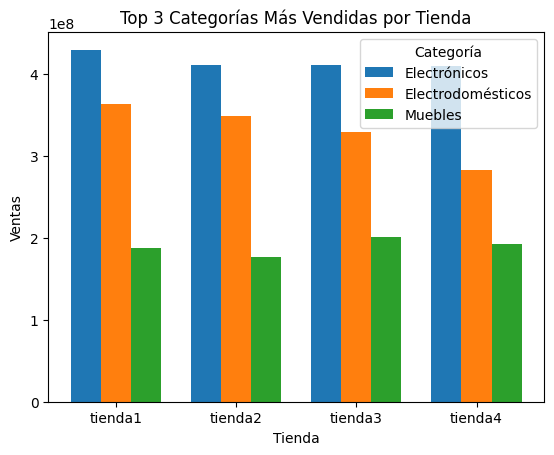

In [43]:
ventas_categoria = (
    df_total
    .groupby(['Tienda', 'Categoría del Producto'])['Precio']
    .sum()
    .reset_index()
)

top_3 = (
    ventas_categoria
    .sort_values(['Tienda', 'Precio'], ascending=[True, False])
    .groupby('Tienda')
    .head(3)
)

tiendas = top_3['Tienda'].unique()
categorias = top_3['Categoría del Producto'].unique()

x = np.arange(len(tiendas))   # posiciones base de las tiendas
ancho = 0.25                  # ancho de cada barra

plt.figure()

for i, categoria in enumerate(categorias):
    valores = []

    for tienda in tiendas:
        dato = top_3[
            (top_3['Tienda'] == tienda) &
            (top_3['Categoría del Producto'] == categoria)
        ]['Precio']

        valores.append(dato.values[0] if not dato.empty else 0)

    plt.bar(
        x + i * ancho,
        valores,
        ancho,
        label=categoria
    )

plt.xticks(x + ancho, tiendas)
plt.title('Top 3 Categorías Más Vendidas por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ventas')
plt.legend(title='Categoría')
plt.show()

### **3.2 Comportamiento del cliente**

### **3.2.1 Valoración media por tienda**

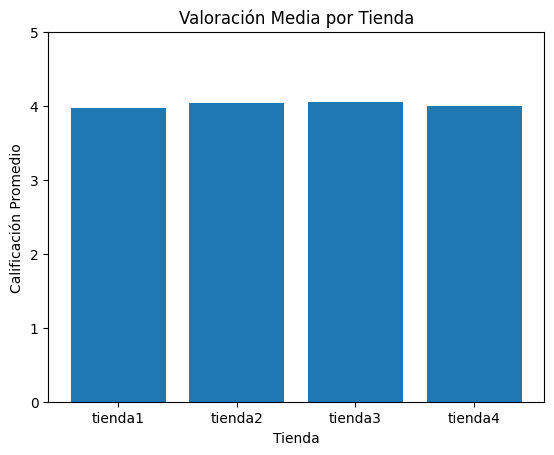

In [44]:
valoracion = (
    df_total
    .groupby('Tienda')['Calificación']
    .mean()
    .reset_index()
)

plt.figure()
plt.bar(valoracion['Tienda'], valoracion['Calificación'])
plt.title('Valoración Media por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(0, 5)
plt.show()

### **3.2.2. Productos más y menos vendidos**

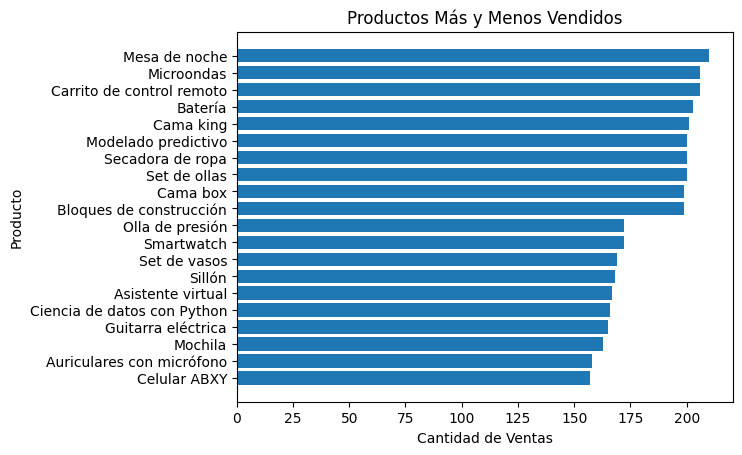

In [48]:
ventas_producto = df_total['Producto'].value_counts()

top_10 = ventas_producto.head(10)
bottom_10 = ventas_producto.tail(10)

productos_combinados = pd.concat([top_10, bottom_10]).sort_values()

plt.figure()
plt.barh(productos_combinados.index, productos_combinados.values)
plt.title('Productos Más y Menos Vendidos')
plt.xlabel('Cantidad de Ventas')
plt.ylabel('Producto')
plt.show()

## **3.3. Eficiencia Operativa**

### **3.3.1. Costo de envío promedio por tienda**

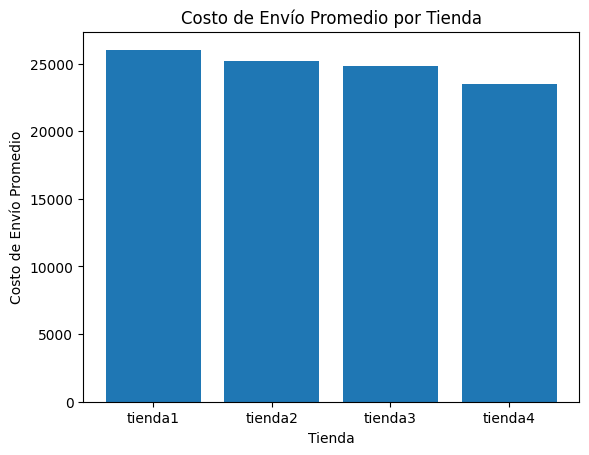

In [47]:
envio_promedio = (
    df_total
    .groupby('Tienda')['Costo de envío']
    .mean()
    .reset_index()
)

plt.figure()
plt.bar(envio_promedio['Tienda'], envio_promedio['Costo de envío'])
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio')
plt.show()